#Лабораторна робота №1
#Студента групи МІТ-31 (підгрупа 2)
#Маніла Дмитра Олексійовича

In [ ]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn

#Завдання
1.  NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.
2.  Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))
3.  Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)
4.  Відповіді оформити .ipynb документом
5.  Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де має бути .ipynb файл та необхідні файли з даними

In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
customers = pd.read_csv("FyntraCustomerData.csv")

In [2]:
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
correlation = customers.corr()

<AxesSubplot:>

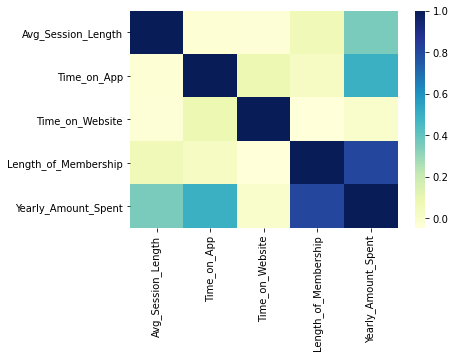

In [11]:
sns.heatmap(correlation, cmap="YlGnBu")

In [20]:
X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]
y = customers['Yearly_Amount_Spent']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=85)
X_test.head()
X_train.head()
y_test.head()
y_train.head()

92     515.828815
214    357.863719
394    557.608262
475    535.321610
330    442.064414
Name: Yearly_Amount_Spent, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)
print('y-intercept\t:',lm.intercept_)
print('beta coefficients\t:',lm.coef_)

y-intercept	: -1067.3824276105238
beta coefficients	: [26.08163249 39.18778762  0.40460005 61.41777824]


In [25]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Y Predicted ')

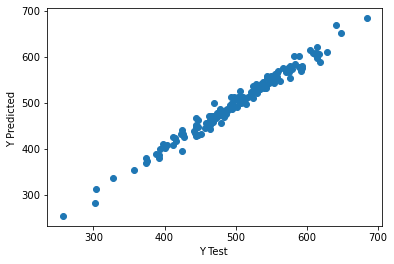

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test ')
plt.ylabel('Y Predicted ')

In [27]:
from sklearn import metrics

print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_test,predictions))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2 value                :' ,metrics.r2_score(y_test,predictions))

Mean Abs Error MAE      : 8.243650912616715
Mean Sqrt Error MSE     : 111.78111141321021
Root Mean Sqrt Error RMSE: 10.572658672879315
r2 value                : 0.9785393661057025


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly_Amount_Spent', ylabel='Density'>

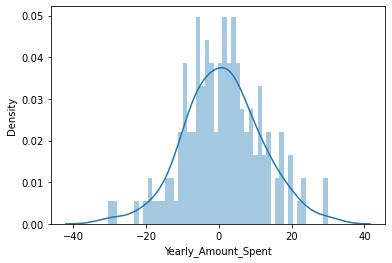

In [29]:
sns.distplot((y_test-predictions),bins=50)

In [30]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778
